Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

Loading Main Dataset

In [2]:
df = pd.read_excel(r'C:\Users\pc\Documents\MACHINE LEARNING\Syntecxhub-Internship-Programme\House Price Prediction Project\datasets\Busan.xlsx',)
df.head()

,Area,Housing price,Floor,Year,Longitude,Latitude,Subway distance,Subway network distance,Maximum floor,Households,...,Female,Sex ratio,Medium age,Young population ratio,Elderly population ratio,Population density,Higher degree ratio,Spring,Fall,Winter
0,45.07,18000,8,2017,129.108144,35.215019,206.23506,285.722366,13.0,84.0,...,15681,97.831771,55.4,26.284572,5.712075,1637.044855,46.392339,0,0,1
1,38.10,19000,13,2017,129.108144,35.215019,206.23506,285.722366,13.0,84.0,...,15681,97.831771,55.4,26.284572,5.712075,1637.044855,46.392339,1,0,0
2,45.07,17000,6,2017,129.108144,35.215019,206.23506,285.722366,13.0,84.0,...,15681,97.831771,55.4,26.284572,5.712075,1637.044855,46.392339,1,0,0
3,38.10,18000,13,2017,129.108144,35.215019,206.23506,285.722366,13.0,84.0,...,15681,97.831771,55.4,26.284572,5.712075,1637.044855,46.392339,0,0,0
4,38.10,16200,7,2017,129.108144,35.215019,206.23506,285.722366,13.0,84.0,...,15681,97.831771,55.4,26.284572,5.712075,1637.044855,46.392339,0,0,0


In [3]:
df.columns

Index(['Area', 'Housing price', 'Floor', 'Year', 'Longitude', 'Latitude',
       'Subway distance', 'Subway network distance', 'Maximum floor',
       'Households', 'Buildings', 'Parking space', 'Heating', 'Top school',
       'High school', 'CBD', 'Green space distance', 'Waterfront distance',
       'Bus stops', 'Population', 'Male', 'Female', 'Sex ratio', 'Medium age',
       'Young population ratio', 'Elderly population ratio',
       'Population density', 'Higher degree ratio', 'Spring', 'Fall',
       'Winter'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53458 entries, 0 to 53457
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area                      53458 non-null  float64
 1   Housing price             53458 non-null  int64  
 2   Floor                     53458 non-null  int64  
 3   Year                      53458 non-null  int64  
 4   Longitude                 53458 non-null  float64
 5   Latitude                  53458 non-null  float64
 6   Subway distance           53458 non-null  float64
 7   Subway network distance   53458 non-null  float64
 8   Maximum floor             53458 non-null  float64
 9   Households                53458 non-null  float64
 10  Buildings                 53458 non-null  int64  
 11  Parking space             53458 non-null  float64
 12  Heating                   53458 non-null  int64  
 13  Top school                53458 non-null  int64  
 14  High s

In [5]:
df.describe()

,Area,Housing price,Floor,Year,Longitude,Latitude,Subway distance,Subway network distance,Maximum floor,Households,...,Female,Sex ratio,Medium age,Young population ratio,Elderly population ratio,Population density,Higher degree ratio,Spring,Fall,Winter
count,53458.000000,53458.000000,53458.000000,53458.000000,53458.000000,53458.000000,53458.000000,53458.000000,53458.000000,53458.000000,...,53458.000000,53458.000000,53458.000000,53458.000000,53458.000000,53458.000000,53458.000000,53458.000000,53458.000000,53458.00000
mean,77.349494,31036.829511,11.788881,2003.618336,129.067350,35.169651,1300.355163,1801.539241,23.215395,935.035729,...,13207.758109,95.762253,42.609585,12.108162,16.336052,13278.330982,30.270925,0.213102,0.341651,0.24739
std,29.076827,19555.911618,8.177000,10.214846,0.069633,0.056230,1966.456771,2724.370340,10.314928,884.835551,...,7164.395276,4.659817,3.630289,4.113654,4.445122,10794.451028,9.855714,0.409503,0.474268,0.43150
min,12.488000,1000.000000,-1.000000,1969.000000,128.831878,35.048503,20.900239,28.955629,2.000000,4.000000,...,583.000000,81.024485,32.700000,3.150868,5.712075,1.003374,10.356044,0.000000,0.000000,0.00000
25%,59.800000,18500.000000,6.000000,1996.000000,129.015153,35.136230,359.999472,498.750798,15.000000,299.000000,...,7974.000000,92.942570,40.800000,9.499702,13.894832,6904.826255,24.238179,0.000000,0.000000,0.00000
50%,78.180000,26000.000000,10.500000,2004.000000,129.076243,35.168469,627.708412,869.640362,24.000000,690.000000,...,12579.000000,95.585799,42.750000,11.332424,16.116149,11277.575760,28.617863,0.000000,0.000000,0.00000
75%,84.979000,38300.000000,16.000000,2013.000000,129.111868,35.202916,1177.449218,1631.262773,26.000000,1280.000000,...,16089.000000,97.804290,44.400000,13.904341,18.760549,17618.072290,36.029483,0.000000,1.000000,0.00000
max,269.680000,414340.000000,77.000000,2019.000000,129.255899,35.368501,15550.206640,21543.581520,84.000000,5239.000000,...,42121.000000,124.508223,55.400000,26.284572,33.292079,118181.818200,61.288715,1.000000,1.000000,1.00000


In [6]:
df.shape

(53458, 31)

In [7]:
df.isna().sum()

Area                        0
Housing price               0
Floor                       0
Year                        0
Longitude                   0
Latitude                    0
Subway distance             0
Subway network distance     0
Maximum floor               0
Households                  0
Buildings                   0
Parking space               0
Heating                     0
Top school                  0
High school                 0
CBD                         0
Green space distance        0
Waterfront distance         0
Bus stops                   0
Population                  0
Male                        0
Female                      0
Sex ratio                   0
Medium age                  0
Young population ratio      0
Elderly population ratio    0
Population density          0
Higher degree ratio         0
Spring                      0
Fall                        0
Winter                      0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(830)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53458 entries, 0 to 53457
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area                      53458 non-null  float64
 1   Housing price             53458 non-null  int64  
 2   Floor                     53458 non-null  int64  
 3   Year                      53458 non-null  int64  
 4   Longitude                 53458 non-null  float64
 5   Latitude                  53458 non-null  float64
 6   Subway distance           53458 non-null  float64
 7   Subway network distance   53458 non-null  float64
 8   Maximum floor             53458 non-null  float64
 9   Households                53458 non-null  float64
 10  Buildings                 53458 non-null  int64  
 11  Parking space             53458 non-null  float64
 12  Heating                   53458 non-null  int64  
 13  Top school                53458 non-null  int64  
 14  High s

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52628 entries, 0 to 53457
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area                      52628 non-null  float64
 1   Housing price             52628 non-null  int64  
 2   Floor                     52628 non-null  int64  
 3   Year                      52628 non-null  int64  
 4   Longitude                 52628 non-null  float64
 5   Latitude                  52628 non-null  float64
 6   Subway distance           52628 non-null  float64
 7   Subway network distance   52628 non-null  float64
 8   Maximum floor             52628 non-null  float64
 9   Households                52628 non-null  float64
 10  Buildings                 52628 non-null  int64  
 11  Parking space             52628 non-null  float64
 12  Heating                   52628 non-null  int64  
 13  Top school                52628 non-null  int64  
 14  High school

In [13]:
df.describe()

,Area,Housing price,Floor,Year,Longitude,Latitude,Subway distance,Subway network distance,Maximum floor,Households,...,Female,Sex ratio,Medium age,Young population ratio,Elderly population ratio,Population density,Higher degree ratio,Spring,Fall,Winter
count,52628.000000,52628.000000,52628.000000,52628.000000,52628.000000,52628.000000,52628.000000,52628.000000,52628.000000,52628.000000,...,52628.000000,52628.000000,52628.000000,52628.000000,52628.000000,52628.000000,52628.000000,52628.000000,52628.000000,52628.000000
mean,77.818931,31216.748081,11.819526,2003.496903,129.067477,35.169945,1305.478957,1808.637852,23.250524,937.332865,...,13222.813673,95.750710,42.602974,12.120139,16.324815,13216.948828,30.300935,0.215285,0.343163,0.243293
std,28.917870,19587.398243,8.201377,10.152686,0.069787,0.056269,1970.974418,2730.629183,10.346492,885.527487,...,7176.650554,4.656927,3.637199,4.120854,4.455280,10685.252327,9.847043,0.411024,0.474770,0.429074
min,12.488000,1000.000000,-1.000000,1969.000000,128.831878,35.048503,20.900239,28.955629,2.000000,4.000000,...,583.000000,81.024485,32.700000,3.150868,5.712075,1.003374,10.356044,0.000000,0.000000,0.000000
25%,59.816000,18600.000000,6.000000,1996.000000,129.015153,35.136261,359.999472,498.750798,15.000000,302.000000,...,8042.000000,92.942570,40.800000,9.499702,13.894832,6904.826255,24.248552,0.000000,0.000000,0.000000
50%,79.340000,26200.000000,11.000000,2004.000000,129.075938,35.169109,629.563150,872.209956,24.000000,690.000000,...,12579.000000,95.585799,42.800000,11.332424,16.116149,11125.568180,28.790920,0.000000,0.000000,0.000000
75%,84.980000,38500.000000,16.000000,2013.000000,129.112504,35.203352,1189.770079,1648.332352,26.000000,1280.000000,...,16089.000000,97.795094,44.400000,13.904341,18.723928,17618.072290,36.029483,0.000000,1.000000,0.000000
max,269.680000,414340.000000,77.000000,2019.000000,129.255899,35.368501,15550.206640,21543.581520,84.000000,5239.000000,...,42121.000000,124.508223,55.400000,26.284572,33.292079,118181.818200,61.288715,1.000000,1.000000,1.000000


In [14]:
df.drop(['Male', 'Female', 'Spring', 'Fall', 'Winter'], axis=1, inplace=True)

In [15]:
df.head()

,Area,Housing price,Floor,Year,Longitude,Latitude,Subway distance,Subway network distance,Maximum floor,Households,...,Green space distance,Waterfront distance,Bus stops,Population,Sex ratio,Medium age,Young population ratio,Elderly population ratio,Population density,Higher degree ratio
0,45.07,18000,8,2017,129.108144,35.215019,206.23506,285.722366,13.0,84.0,...,106.489859,1202.32825,5,31022,97.831771,55.4,26.284572,5.712075,1637.044855,46.392339
1,38.10,19000,13,2017,129.108144,35.215019,206.23506,285.722366,13.0,84.0,...,106.489859,1202.32825,5,31022,97.831771,55.4,26.284572,5.712075,1637.044855,46.392339
2,45.07,17000,6,2017,129.108144,35.215019,206.23506,285.722366,13.0,84.0,...,106.489859,1202.32825,5,31022,97.831771,55.4,26.284572,5.712075,1637.044855,46.392339
3,38.10,18000,13,2017,129.108144,35.215019,206.23506,285.722366,13.0,84.0,...,106.489859,1202.32825,5,31022,97.831771,55.4,26.284572,5.712075,1637.044855,46.392339
4,38.10,16200,7,2017,129.108144,35.215019,206.23506,285.722366,13.0,84.0,...,106.489859,1202.32825,5,31022,97.831771,55.4,26.284572,5.712075,1637.044855,46.392339


Exploratory Data Analysis

Numerical Variables Distribution

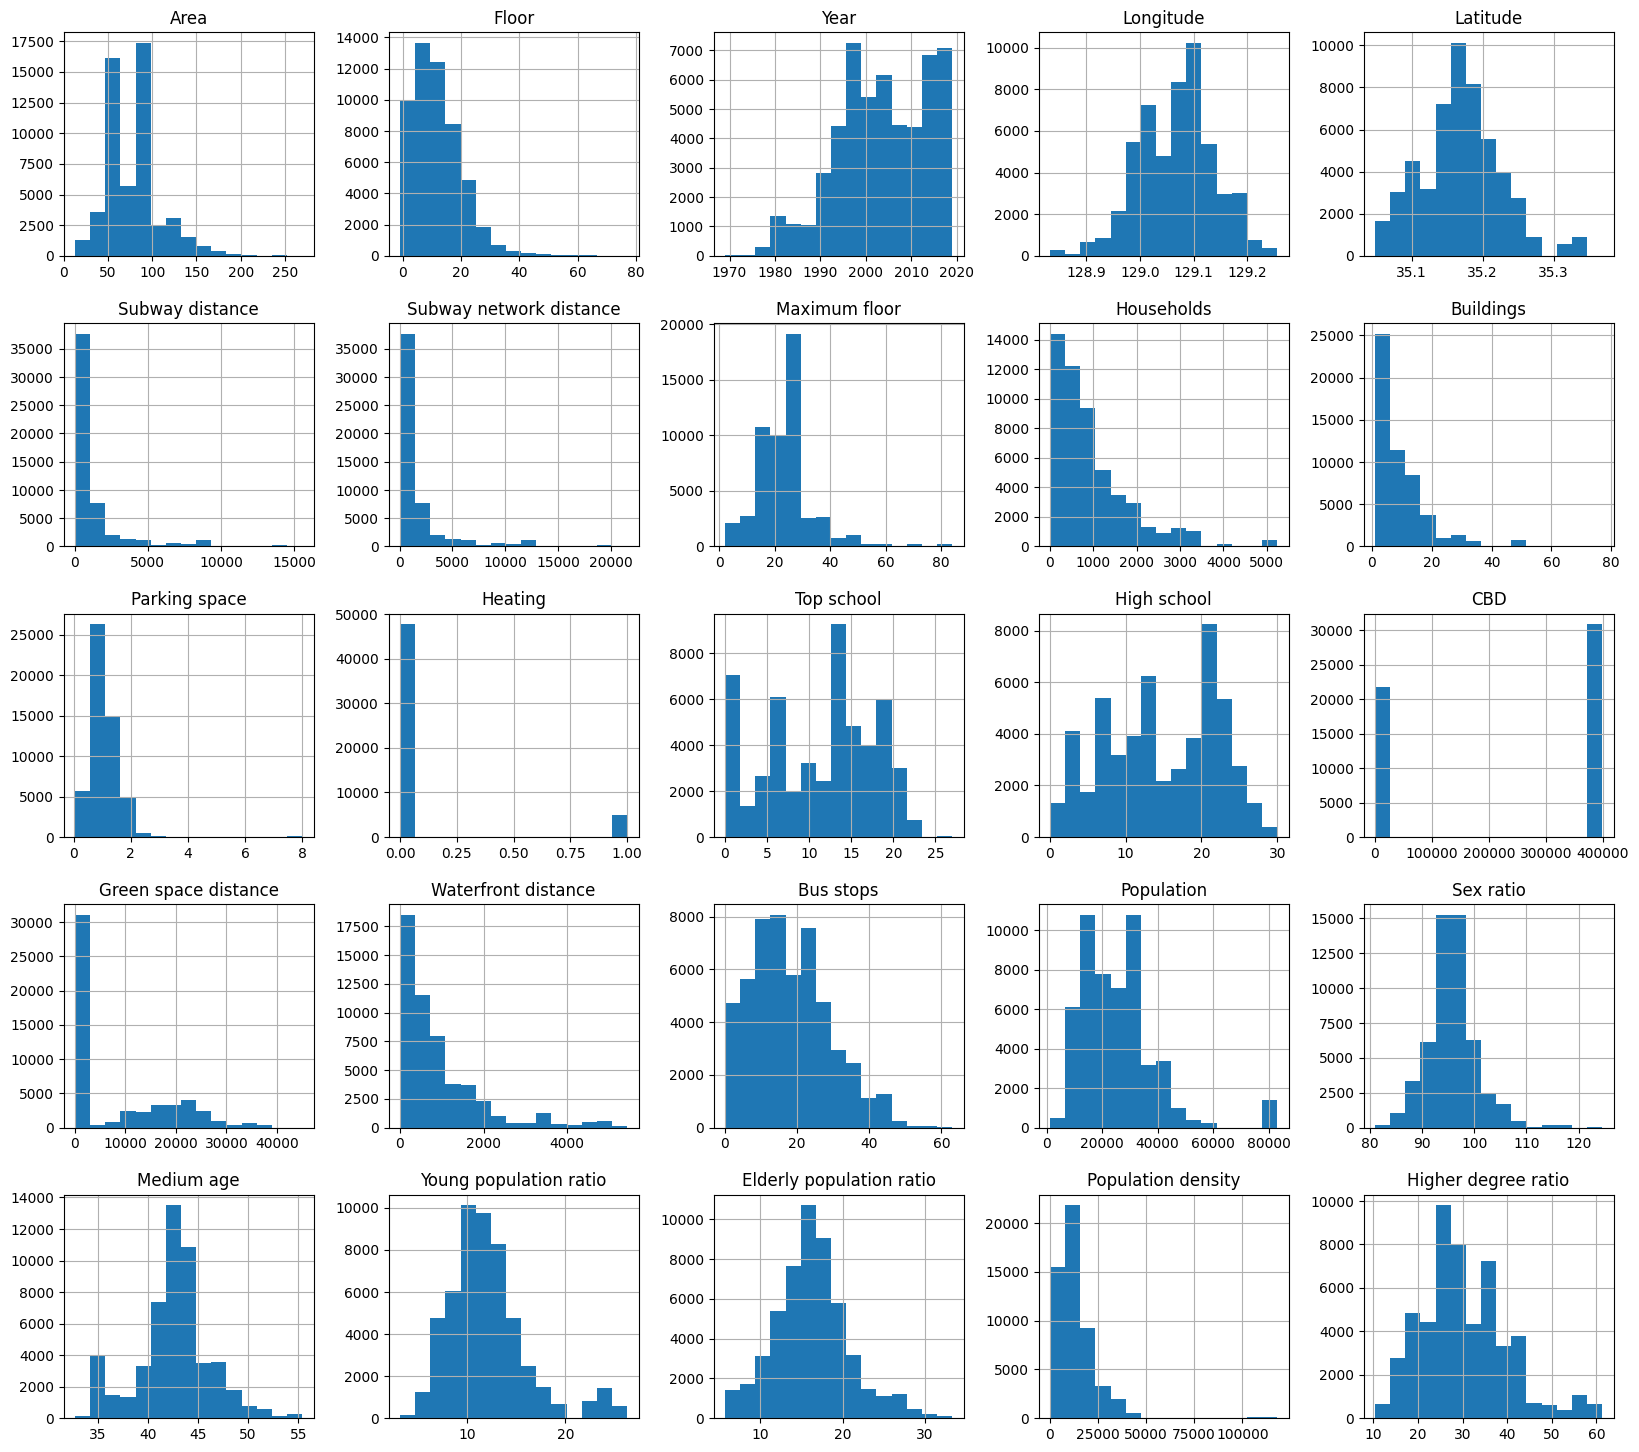

In [16]:
df_num = df._get_numeric_data().drop('Housing price', axis=1)
df_num.hist(bins=15, figsize=(20,18))
plt.show()

Target Variable Distribution

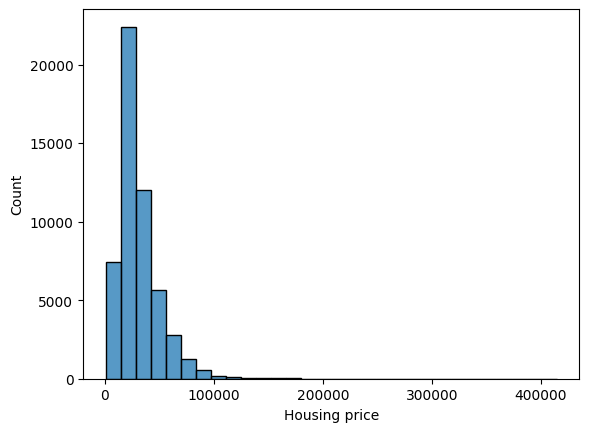

In [17]:
sns.histplot(df['Housing price'], bins=30)
plt.show()


Feature Correlation

In [18]:
df_num = df._get_numeric_data()
df_corr = df.corr()['Housing price'].drop('Housing price')
df_corr

Area                        0.716904
Floor                       0.380105
Year                        0.218008
Longitude                   0.274673
Latitude                    0.043277
Subway distance            -0.131778
Subway network distance    -0.131778
Maximum floor               0.576882
Households                  0.275211
Buildings                   0.185738
Parking space               0.499622
Heating                     0.012188
Top school                  0.102264
High school                 0.092155
CBD                         0.110325
Green space distance       -0.106026
Waterfront distance        -0.062759
Bus stops                  -0.011321
Population                  0.006036
Sex ratio                  -0.189853
Medium age                 -0.068380
Young population ratio      0.150149
Elderly population ratio   -0.111013
Population density          0.142661
Higher degree ratio         0.223699
Name: Housing price, dtype: float64

In [19]:
df_num.corr()['Housing price'].drop('Housing price').abs().sort_values(ascending=False)


Area                        0.716904
Maximum floor               0.576882
Parking space               0.499622
Floor                       0.380105
Households                  0.275211
Longitude                   0.274673
Higher degree ratio         0.223699
Year                        0.218008
Sex ratio                   0.189853
Buildings                   0.185738
Young population ratio      0.150149
Population density          0.142661
Subway network distance     0.131778
Subway distance             0.131778
Elderly population ratio    0.111013
CBD                         0.110325
Green space distance        0.106026
Top school                  0.102264
High school                 0.092155
Medium age                  0.068380
Waterfront distance         0.062759
Latitude                    0.043277
Heating                     0.012188
Bus stops                   0.011321
Population                  0.006036
Name: Housing price, dtype: float64

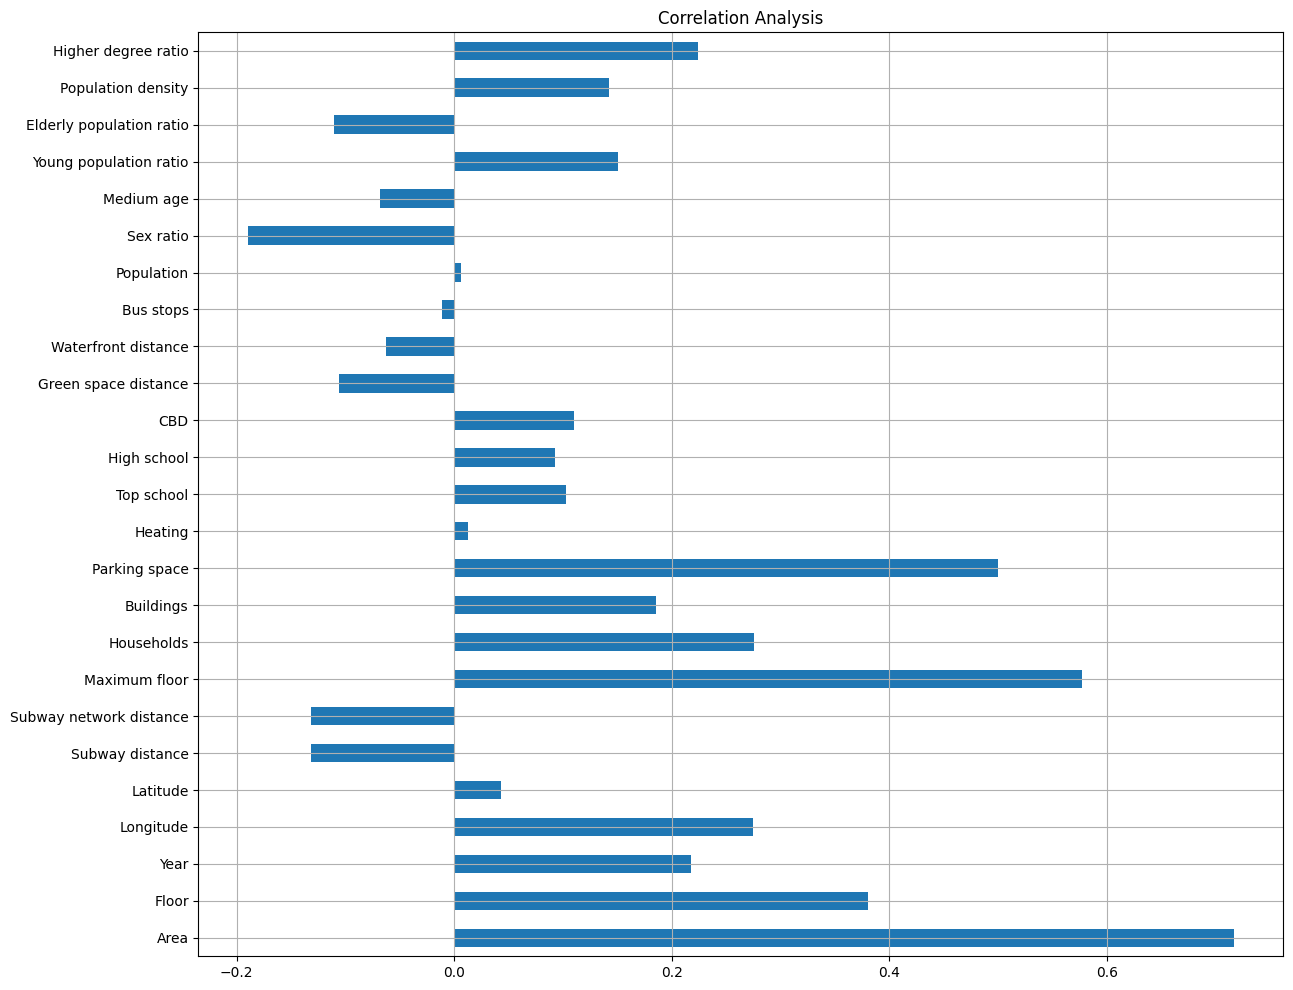

In [20]:
plt.figure(figsize=(14,12))
df_corr.plot(kind='barh', grid=True)
plt.title('Correlation Analysis')
plt.show()

In [21]:
df_corr = df_num.columns

In [22]:
df_corr = df[['Area', 'Housing price', 'Floor', 'Year', 'Longitude', 'Latitude',
       'Subway distance', 'Subway network distance', 'Maximum floor',
       'Households', 'Buildings', 'Parking space', 'Heating', 'Top school',
       'High school', 'CBD', 'Green space distance', 'Waterfront distance',
       'Bus stops', 'Population', 'Sex ratio', 'Medium age',
       'Young population ratio', 'Elderly population ratio',
       'Population density', 'Higher degree ratio']]

df_corr = df_corr.corr()

Feature Correlation Heatmap

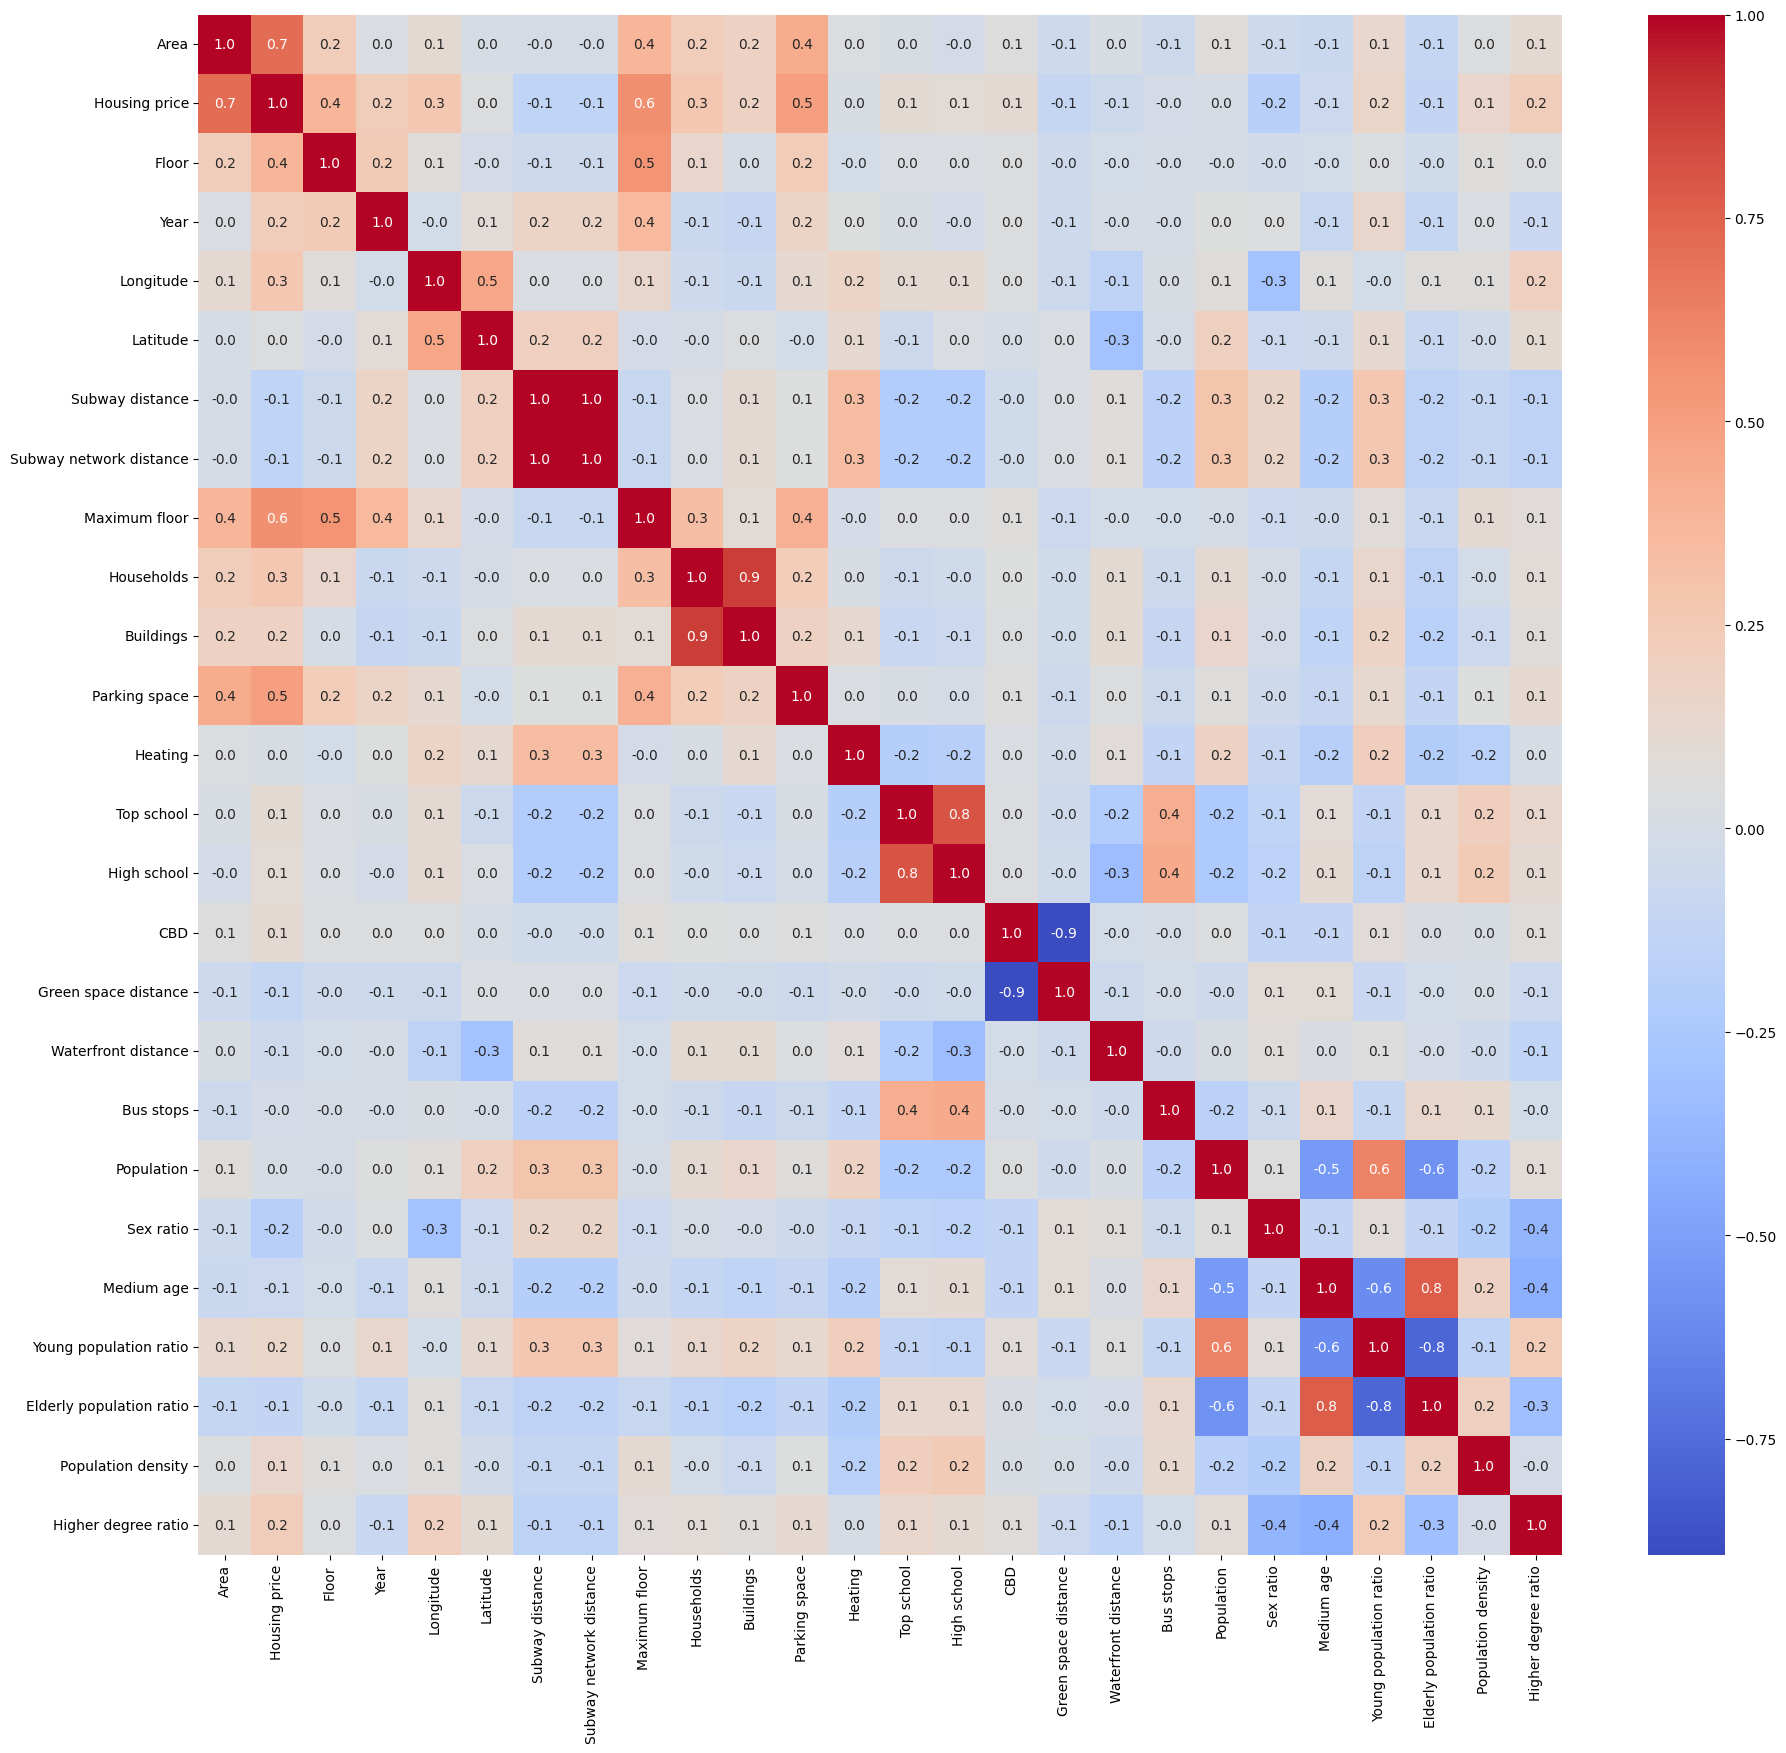

In [23]:
plt.figure(figsize=(22,20))
sns.heatmap(data=df_corr, annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

Data Splitting

In [24]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [25]:
test.shape

(10526, 26)

In [26]:
train.shape

(42102, 26)

In [27]:
train.to_csv('Busan housing prediction train set.csv', index=False)
test.to_csv('Busan housing prediction test set.csv', index=False)